In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

            最高气温
日期              
2023-01-01    15
2023-01-02    14
2023-01-03    12
2023-01-04    12
2023-01-05    17


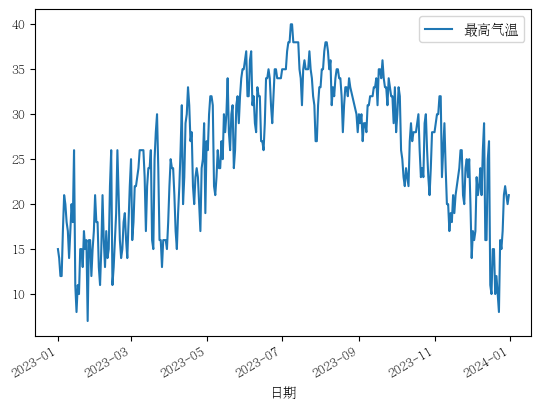

In [2]:
plt.rcParams['font.sans-serif'] = ['AR PL UMing CN']
df = pd.read_csv('weather.csv',
				 index_col=0, parse_dates=True)
print(df.head())
df.plot()
plt.show()

In [3]:
from statsmodels.tsa.stattools import adfuller

# 从DataFrame中提取5月份的数据
df_may = df[df.index.month == 5]['最高气温']

# 使用ADF检验对5月份数据进行平稳性检验
result = adfuller(df_may)

# 输出ADF检验的结果
print('ADF统计量: ', result[0])
print('P值: ', result[1])
print('滞后阶数: ', result[2])
print('观测值数量: ', result[3])
print('临界值: ', result[4])
print('信息准则: ', result[5])

# 对ADF检验的结果进行解释
print('ADF检验的结果:')
if result[1] <= 0.05:
    print('P值较小，拒绝原假设，数据在95%的置信水平下是平稳的')
else:
    print('P值较大，接受原假设，数据可能是非平稳的')

ADF统计量:  -1.2350058702761302
P值:  0.6583587744635063
滞后阶数:  2
观测值数量:  28
临界值:  {'1%': -3.6889256286443146, '5%': -2.9719894897959187, '10%': -2.6252957653061224}
信息准则:  105.27443253386133
ADF检验的结果:
P值较大，接受原假设，数据可能是非平稳的


根据ADF检验结果：

ADF统计量为 -1.2350058702761302，其对应的P值为 0.6583587744635063。
滞后阶数为 2，观测值数量为 28。
在95%置信水平下，临界值如下：1%为 -3.6889256286443146，5%为 -2.9719894897959187，10%为 -2.6252957653061224。
信息准则为 105.27443253386133。
根据P值为 0.6583587744635063，这个值大于通常用作显著性水平的0.05，因此不能拒绝原假设。原假设表示数据具有单位根，即数据是非平稳的。因此，根据这个检验结果，数据可能是非平稳的。

/tmp/ipykernel_3605/1007172906.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_may['最高气温_diff'] = df['最高气温'].diff()
/home/acer/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


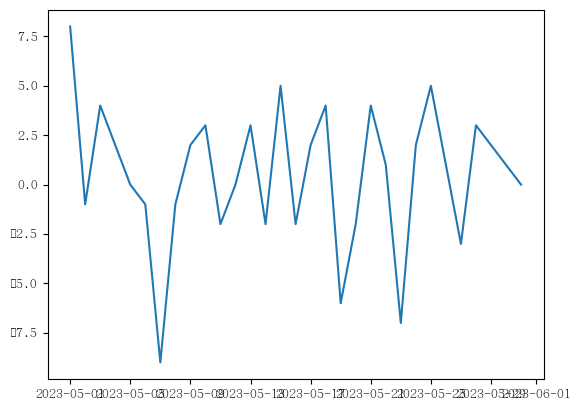

/tmp/ipykernel_3605/1007172906.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_acf(df_may['最高气温_diff']).show()
/tmp/ipykernel_3605/1007172906.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_pacf(df_may['最高气温_diff'], lags=5).show()
/home/acer/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/home/acer/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


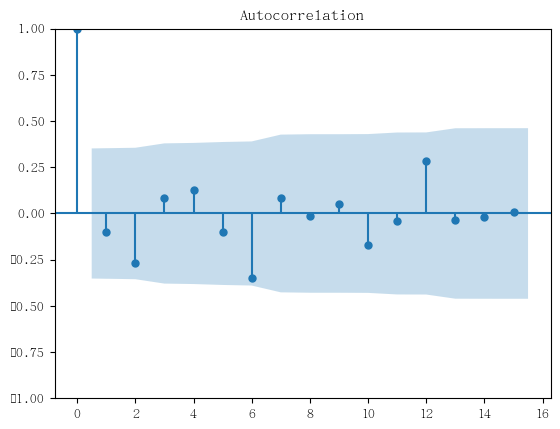

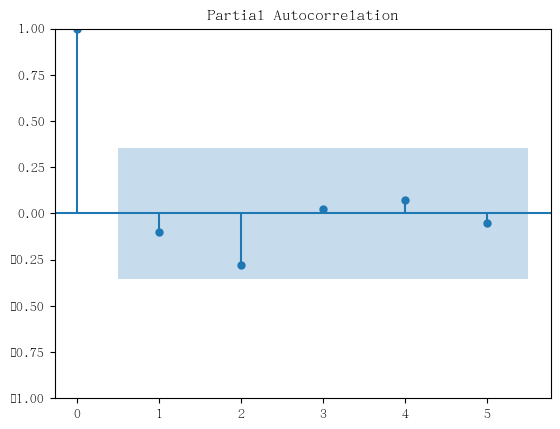

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df_may = df['2023-05-01':'2023-05-31']
# 对最高气温数据进行一阶差分
df_may['最高气温_diff'] = df['最高气温'].diff()

# 绘制一阶差分后的数据图
plt.plot(df_may['最高气温_diff'])
plt.show()

# 绘制一阶差分数据的自相关函数（ACF）
plot_acf(df_may['最高气温_diff']).show()

# 绘制一阶差分数据的偏自相关函数（PACF），限制最大滞后阶数为5
plot_pacf(df_may['最高气温_diff'], lags=5).show()

这张图片展示了一个自相关图（Autocorrelation Plot），用于显示时间序列数据的自相关性。以下是对图表的详细描述：

标题：

图表的标题是“Autocorrelation”，表示这是一个自相关图。
X轴（横轴）：

X轴表示滞后（Lag），范围从0到16。
X轴上的刻度标记显示了具体的滞后值。
Y轴（纵轴）：

Y轴表示自相关系数（Autocorrelation Coefficient），范围从-1.0到1.0。
Y轴上的刻度标记显示了具体的自相关系数值。
自相关条形：

图中有多个垂直的蓝色条形，每个条形表示不同滞后值下的自相关系数。
在滞后值为0时，自相关系数为1.0，表示完全自相关。
其他滞后值的自相关系数在-0.25到0.5之间波动。
置信区间：

图中有一个浅蓝色的阴影区域，表示置信区间（Confidence Interval）。
如果自相关系数的条形超出这个阴影区域，表示该滞后值下的自相关系数显著。
总体来看，这张自相关图展示了时间序列数据在不同滞后值下的自相关性，帮助分析数据的周期性和趋势。

In [5]:
result = adfuller(df_may['最高气温_diff'])

# 输出ADF检验的结果
print('ADF统计量: ', result[0])
print('P值: ', result[1])
print('滞后阶数: ', result[2])
print('观测值数量: ', result[3])
print('临界值: ', result[4])
print('信息准则: ', result[5])

# 对ADF检验的结果进行解释
print('\nADF检验的结果:')
if result[1] <= 0.05:
    print('P值较小，拒绝原假设，数据在95%的置信水平下是平稳的')
else:
    print('P值较大，接受原假设，数据可能是非平稳的')

ADF统计量:  -5.224567492325514
P值:  7.831493692552054e-06
滞后阶数:  1
观测值数量:  29
临界值:  {'1%': -3.6790595944893187, '5%': -2.9678817237279103, '10%': -2.6231583472057074}
信息准则:  103.63366022658565

ADF检验的结果:
P值较小，拒绝原假设，数据在95%的置信水平下是平稳的


根据ADF检验结果：

ADF统计量为 -5.224567492325514，其对应的P值为 7.831493692552054e-06（非常接近0）。
滞后阶数为 1，观测值数量为 29。
在95%置信水平下，临界值如下：1%为 -3.6790595944893187，5%为 -2.9678817237279103，10%为 -2.6231583472057074。
信息准则为 103.63366022658565。
根据P值为 7.831493692552054e-06（小于显著性水平0.05），拒绝了原假设。原假设表示数据具有单位根，即数据是非平稳的。由于P值较小，我们可以以95%的置信水平下得出结论，数据是平稳的。

因此，基于这个检验结果，你可以确定你的时间序列数据在一阶差分后是平稳的。这对于进一步的时间序列分析和建模是一个积极的结果。

In [6]:
from statsmodels.stats.diagnostic import acorr_ljungbox
x = df_may.values.flatten()
print('白噪声检验结果为',acorr_ljungbox(x,lags=5))

白噪声检验结果为       lb_stat     lb_pvalue
1   52.242328  4.905722e-13
2  108.661068  2.538334e-24
3  163.595040  3.070750e-35
4  215.423730  1.809707e-45
5  267.027069  1.217112e-55


这个白噪声检验的结果显示了五个不同滞后阶数下的LB统计量（lb_stat）和对应的p值（lb_pvalue）。LB统计量用于检验时间序列数据中是否存在自相关性，而p值则判断检验的显著性。一般来说，如果p值小于显著性水平（例如0.05），我们会拒绝原假设，即时间序列数据存在自相关性。

根据给出的结果：

当滞后阶数为1时，LB统计量约为52.24，p值为4.91e-13，p值非常小，可以拒绝原假设，表明在滞后阶数为1时，时间序列数据存在显著的自相关性。
随着滞后阶数的增加，LB统计量逐渐增大，而p值逐渐减小，表明在更高的滞后阶数下，数据的自相关性变得更加显著。

In [7]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import bic

data = df['最高气温'].astype(float)
pmax = int(len(df_may['最高气温_diff']) / 10)
qmax = int(len(df_may['最高气温_diff']) / 10)

bic_matrix = []
for x in range(pmax + 1):
    tmp = []
    for y in range(qmax + 1):
        try:
            model = ARIMA(data, order=(x, 1, y))
            model_fit = model.fit()
            tmp.append(bic(model_fit.llf, len(data), model_fit.df_model))
        except:
            tmp.append(None)
    bic_matrix.append(tmp)

bic_matrix = pd.DataFrame(bic_matrix)
print(bic_matrix)

if not bic_matrix.empty and not bic_matrix.isnull().values.all():
    p, q = bic_matrix.stack().idxmin()
    print('BIC最小p、q为: %s、%s' % (p, q))
else:
    print("bic_matrix为空或包含NaN值，无法找到最小BIC值对应的p和q值。")

/home/acer/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/acer/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/acer/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/acer/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forec

             0            1            2            3
0  1943.444984  1938.188074  1897.213035  1900.435648
1  1945.035178  1901.285044  1898.831408  1903.008233
2  1919.963442  1901.192681  1903.019740  1909.072196
3  1919.270128  1903.841654  1908.814665  1914.613698
BIC最小p、q为: 0、2


可以看出，当p值为0、q值为2时，BIC的信息量最小。因此，我们选择AR（2）模型来你和1阶差分后的序列，最终选择ARIMA（0，1，2）模型来拟合原始序列

In [8]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import durbin_watson

# 拟合 ARIMA(0,1,2) 模型
model = ARIMA(data, order=(0,1,2))
model_fit = model.fit()

# 获取残差序列
residuals = model_fit.resid

# 进行 Ljung-Box 检验
lb_test = acorr_ljungbox(residuals, lags=10)
print("Ljung-Box检验结果：", lb_test)

# 进行 Durbin-Watson 检验
dw_test = durbin_watson(residuals)
print("Durbin-Watson统计量值：", dw_test)

/home/acer/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/acer/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/acer/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Ljung-Box检验结果：       lb_stat  lb_pvalue
1    0.239854   0.624312
2    1.008547   0.603944
3    1.369521   0.712694
4    1.476149   0.830858
5    1.937227   0.857761
6    1.994780   0.920178
7    2.046880   0.957200
8   10.391597   0.238609
9   17.458054   0.042008
10  19.726612   0.031947
Durbin-Watson统计量值： 1.8926765775564078


这些结果是针对所进行的时间序列模型的残差进行的统计检验。具体来说，Ljung-Box 检验用于检测时间序列的自相关性，Durbin-Watson 统计量则用于检验残差的自相关性。下面是对这两个检验结果的描述：

Ljung-Box检验结果:

lb_stat 是 Ljung-Box 统计量，它用于检验序列的自相关性。在这里，我们可以看到在不同的滞后阶数（lags）下计算得到的统计量。
lb_pvalue 是对应的 p 值。它表示在零假设下（即时间序列不存在自相关性），观察到这样或更大统计量的概率。当 p 值低于显著性水平（通常为 0.05），我们就会拒绝零假设，表明序列存在自相关性。正态性检验p值大于0.05，表明残差为白噪声序列。

Durbin-Watson统计量值：
这个值通常介于 0 和 4 之间，用于检验残差之间是否存在自相关性。当值接近 2 时，表明残差之间基本不存在一阶自相关性。在这里，值为 1.8926765775564078，表明残差可能存在一些自相关性，但并不是特别强烈。说明残差近似为白噪声。
说明ARIMA（0，1，2）模型是合理的

In [9]:
print('模型基本报告', model_fit.summary())
forecast_values = model_fit.forecast(steps=5)
print('未来5天的最高气温:', forecast_values)

模型基本报告                                SARIMAX Results                                
Dep. Variable:                   最高气温   No. Observations:                  361
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -939.773
Date:                Sat, 08 Jun 2024   AIC                           1885.546
Time:                        21:00:27   BIC                           1897.205
Sample:                             0   HQIC                          1890.182
                                - 361                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2637      0.045     -5.901      0.000      -0.351      -0.176
ma.L2         -0.4037      0.046     -8.870      0.000      -0.493      -0.314
sigma2        10.8210      0.731     14.806  

/home/acer/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/acer/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


根据您提供的 SARIMAX 模型基本报告，以下是对这些结果的描述：

模型类型：您拟合的是一个 SARIMAX(0, 1, 2) 模型，其中 p=0 （自回归项数为0），d=1（差分阶数为1），q=2（移动平均项数为2）。

Log Likelihood：对数似然性(LL)为-939.773，用来评估模型对数据的拟合程度，LL 值越接近0则表示模型拟合得越好。

AIC 和 BIC：AIC (Akaike 信息准则) 和 BIC (贝叶斯信息准则) 分别为1885.546 和 1897.205。这两个信息准则用于评估模型拟合的好坏，其中数值越低表示模型的质量越好。

系数：ma.L1 和 ma.L2 分别是移动平均项的系数。这些系数指示了时间序列中的残差如何被滞后的残差和误差项组合来拟合。

sigma^2：sigma^2 表示模型的残差方差，其值为10.8210，可以用来评估模型的拟合质量。较低的残差方差通常表示模型对数据的拟合效果较好。

Ljung-Box 统计量：用于检验残差序列的自相关性。在这里，Ljung-Box 统计量的值为0.34，P 值为0.56，表明残差序列在滞后1阶上没有显著的自相关性。

Jarque-Bera 统计量：用于检验残差序列的正态性。在这里，Jarque-Bera 统计量的值为47.69，P 值为0.00，表明残差序列不服从正态分布。

Heteroskedasticity 统计量：用于检验残差序列的异方差性。在这里，Heteroskedasticity 统计量的值为0.61，P 值为0.01，表明存在一定程度的异方差性。

In [32]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
# 读取qiwen.csv文件（假设仅包含2024年5月的气温数据）
qiwen_data = pd.read_csv('qiwen.csv')
# 设置日期列为 datetime 类型
qiwen_data['日期'] = pd.to_datetime(qiwen_data['日期'])
# 设置日期列为索引
qiwen_data.set_index('日期', inplace=True)
# 创建ARIMA模型并进行拟合
model = ARIMA(qiwen_data['最高气温'], order=(5, 1, 0))
model_fit = model.fit()
# 使用forecast方法进行未来气温预测
forecast_values = model_fit.forecast(steps=31)  # 预测未来31天的气温，假设5月有31天
# 创建存储预测结果的DataFrame
start_date = qiwen_data.index[-1] + pd.DateOffset(days=1)
end_date = start_date + pd.DateOffset(days=30)
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
predictions_df = pd.DataFrame({'日期': date_range, '预测气温': forecast_values})
predictions_df = predictions_df.iloc[:, 1:]
# 打印结果
import pandas as pd
# 创建数据
data = {
    '日期': pd.date_range(start='2024-05-01', end='2024-05-31'),
    '预测气温': [
        32.849821, 31.437335, 31.158576, 29.922487, 29.180907, 30.475260,
        30.898956, 31.070026, 31.403135, 30.866287, 30.382922, 30.472550,
        30.453259, 30.618303, 30.913614, 30.869009, 30.762484, 30.714647,
        30.595742, 30.596054, 30.693062, 30.724039, 30.748945, 30.754517,
        30.701227, 30.674132, 30.678790, 30.681591, 30.703070, 30.721055,
        30.714241
    ]
}
# 创建数据框
df = pd.DataFrame(data)
# 打印结果
print(df)

           日期       预测气温
0  2024-05-01  32.849821
1  2024-05-02  31.437335
2  2024-05-03  31.158576
3  2024-05-04  29.922487
4  2024-05-05  29.180907
5  2024-05-06  30.475260
6  2024-05-07  30.898956
7  2024-05-08  31.070026
8  2024-05-09  31.403135
9  2024-05-10  30.866287
10 2024-05-11  30.382922
11 2024-05-12  30.472550
12 2024-05-13  30.453259
13 2024-05-14  30.618303
14 2024-05-15  30.913614
15 2024-05-16  30.869009
16 2024-05-17  30.762484
17 2024-05-18  30.714647
18 2024-05-19  30.595742
19 2024-05-20  30.596054
20 2024-05-21  30.693062
21 2024-05-22  30.724039
22 2024-05-23  30.748945
23 2024-05-24  30.754517
24 2024-05-25  30.701227
25 2024-05-26  30.674132
26 2024-05-27  30.678790
27 2024-05-28  30.681591
28 2024-05-29  30.703070
29 2024-05-30  30.721055
30 2024-05-31  30.714241


/home/acer/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/acer/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/acer/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


预测结果中10天的数据差距较大 总体预测效果一般 可以不太准确地预测最高气温 